In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 17

In [2]:
full_data = pd.read_csv('clean_data_scientist.csv', index_col=0)
full_data.head(5)

,title,company,location,summary,salary,href,rate,reviews,org_salary_period,city,state
0,entry level data scientist,ibm,united states,They draw upon the practice of data analysis ...,NaN,https://www.indeed.com/rc/clk?jk=dbe7498dc4f49...,44.4,"23,530",NaN,United States,none
1,data scientist own all our big data initiatives,alamo drafthouse cinemas,none,You will drive key business decisions through ...,NaN,https://www.indeed.com/rc/clk?jk=82f38b22d2e80...,44.4,287,NaN,None,none
2,data scientist full time,miami heat,none,Apply advanced analytic techniques such as mac...,NaN,https://www.indeed.com/rc/clk?jk=d641d3488fc77...,52.8,27,NaN,None,none
4,data scientist,kaiser permanente,pasadena ca,Additional responsiblilities for related consu...,NaN,https://www.indeed.com/rc/clk?jk=7aed7cc38549b...,52.2,"8,200",NaN,Pasadena,CA
5,data scientist,optimized solutions,chicago il,Job Summary ROLE : DATA SCIENTIST LOCATION : C...,NaN,https://www.indeed.com/company/Optimized-Solut...,52.8,27,NaN,Chicago,IL


In [3]:
full_data.reset_index(drop=True, inplace=True)
print(full_data.shape)
full_data.tail(2)

(14243, 11)


,title,company,location,summary,salary,href,rate,reviews,org_salary_period,city,state
14241,data science instructor,thinkful,plantation fl,You’ll engage with attendees in person on a we...,51700.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,31.8,6,hour,Plantation,FL
14242,nlp and machine learning internship,mei messaging,new york ny,You will conduct research and help implement a...,23030.0,https://www.indeed.com/company/Mei/jobs/Nlp-Ma...,60.0,3,hour,New York,NY


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14243 entries, 0 to 14242
Data columns (total 11 columns):
title                14243 non-null object
company              14243 non-null object
location             14243 non-null object
summary              14240 non-null object
salary               1412 non-null float64
href                 14243 non-null object
rate                 14243 non-null float64
reviews              14243 non-null object
org_salary_period    1412 non-null object
city                 14243 non-null object
state                14243 non-null object
dtypes: float64(2), object(9)
memory usage: 1.2+ MB


In [5]:
full_data.describe()

,salary,rate
count,1412.000000,14243.000000
mean,75870.902904,46.017510
std,40580.471559,5.789445
min,12500.000000,16.800000
25%,50000.000000,42.600000
50%,60000.000000,44.400000
75%,100000.000000,51.000000
max,275000.000000,60.000000


In [6]:
print('salary max: ' + str(full_data['salary'].max()))
print('salary min: ' + str(full_data['salary'].min()))
print('salary median: ' + str(full_data['salary'].median()))
print('salary mean: '+ str(full_data['salary'].mean()))

salary max: 275000.0
salary min: 12500.0
salary median: 60000.0
salary mean: 75870.9029036827


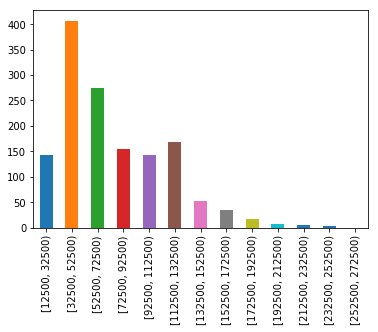

In [7]:
salary_range = list(range(int(full_data['salary'].min()), int(full_data['salary'].max()), 20000))
salary_group = pd.cut(full_data['salary'].values, salary_range, right=False)
# print(salary_group.codes)#标签
# print(salary_group.categories)#分组区间，长度8
frequency=salary_group.value_counts()#series,区间-个数
# print(frequency.index)

frequency.plot(kind='bar')

In [8]:
frequency_df=pd.DataFrame(frequency,columns=['count'])
frequency_df['frequency f']=frequency_df / frequency_df['count'].sum()
frequency_df['frequency %']=frequency_df['frequency f'].map(lambda x:'%.2f%%'%(x*100))
 
frequency_df['accu freq f']=frequency_df['frequency f'].cumsum()
frequency_df['accu freq %']=frequency_df['accu freq f'].map(lambda x:'%.4f%%'%(x*100))
 
frequency_df

,count,frequency f,frequency %,accu freq f,accu freq %
"[12500, 32500)",143,0.101347,10.13%,0.101347,10.1347%
"[32500, 52500)",407,0.288448,28.84%,0.389794,38.9794%
"[52500, 72500)",275,0.194897,19.49%,0.584692,58.4692%
"[72500, 92500)",154,0.109142,10.91%,0.693834,69.3834%
"[92500, 112500)",143,0.101347,10.13%,0.795181,79.5181%
"[112500, 132500)",169,0.119773,11.98%,0.914954,91.4954%
"[132500, 152500)",53,0.037562,3.76%,0.952516,95.2516%
"[152500, 172500)",34,0.024096,2.41%,0.976612,97.6612%
"[172500, 192500)",17,0.012048,1.20%,0.988661,98.8661%
"[192500, 212500)",7,0.004961,0.50%,0.993622,99.3622%


/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Indeed Salary Distribution with Median (black) and Mean (red)')

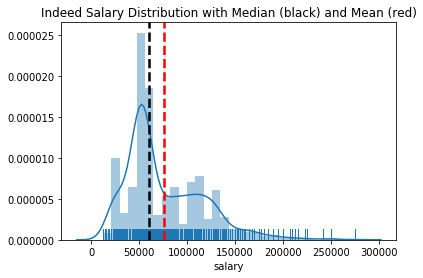

In [9]:
ax = sns.distplot(full_data['salary'].dropna(),rug=True)

ax.axvline(full_data['salary'].median(), lw=2.5, ls='dashed', color='black')
ax.axvline(full_data['salary'].mean(), lw=2.5, ls='dashed', color='red')
plt.title('Indeed Salary Distribution with Median (black) and Mean (red)')

结束整体分析，开始分析多个州以及带review

In [10]:
full_data['state'].value_counts()

NY      1928
CA      1900
WA      1542
CO      1385
TX      1283
PA      1252
none     993
IL       926
GA       714
FL       653
AZ       466
MD       317
VA       278
OR       216
DC       164
DE        51
NJ        42
MA        29
MO        15
MN        12
NC        11
IN         9
WI         8
OH         7
MI         7
ID         7
NV         4
CT         3
TN         3
AR         3
OK         2
KS         2
AL         2
ME         2
SC         2
IA         1
LA         1
RI         1
WV         1
NH         1
Name: state, dtype: int64

In [11]:
most_job_states = full_data['state'].value_counts().index.values[0:6]

In [12]:
full_data['reviews'] = full_data.reviews.str.replace(',','')
full_data['review_status'] = full_data.reviews.str.replace(',','')
full_data['review_status'] = pd.to_numeric(full_data['review_status'], errors='coerce')

In [13]:
review_status_list = []
for value in full_data['review_status']:
    if value<50:
        review_status_list.append('seldom')
    elif value<1500:
        review_status_list.append('normal')
    else:
        review_status_list.append('good')
        
print(len(review_status_list))

14243


In [14]:
full_data['review_status'] = pd.DataFrame(review_status_list)
full_data.head(4)

,title,company,location,summary,salary,href,rate,reviews,org_salary_period,city,state,review_status
0,entry level data scientist,ibm,united states,They draw upon the practice of data analysis ...,NaN,https://www.indeed.com/rc/clk?jk=dbe7498dc4f49...,44.4,23530,NaN,United States,none,good
1,data scientist own all our big data initiatives,alamo drafthouse cinemas,none,You will drive key business decisions through ...,NaN,https://www.indeed.com/rc/clk?jk=82f38b22d2e80...,44.4,287,NaN,None,none,normal
2,data scientist full time,miami heat,none,Apply advanced analytic techniques such as mac...,NaN,https://www.indeed.com/rc/clk?jk=d641d3488fc77...,52.8,27,NaN,None,none,seldom
3,data scientist,kaiser permanente,pasadena ca,Additional responsiblilities for related consu...,NaN,https://www.indeed.com/rc/clk?jk=7aed7cc38549b...,52.2,8200,NaN,Pasadena,CA,good


In [15]:
job_state_df = full_data[full_data.state.isin(most_job_states)]
job_state_df.tail(2)

,title,company,location,summary,salary,href,rate,reviews,org_salary_period,city,state,review_status
14165,data scientist developer,insight global,none,The main project they will be working on at fi...,56400.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,51.6,1773,hour,None,TX,good
14242,nlp and machine learning internship,mei messaging,new york ny,You will conduct research and help implement a...,23030.0,https://www.indeed.com/company/Mei/jobs/Nlp-Ma...,60.0,3,hour,New York,NY,seldom


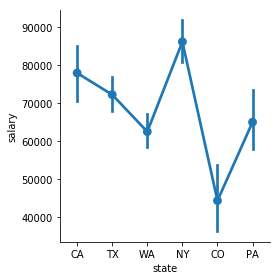

In [16]:
sns.factorplot('state', 'salary', data=job_state_df)

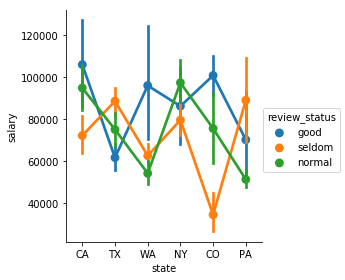

In [17]:
sns.factorplot('state', 'salary',  hue='review_status', data=job_state_df)

In [18]:
job_state_df['review_status'].loc[job_state_df['review_status'] == 'seldom'] = 0
job_state_df['review_status'].loc[job_state_df['review_status'] == 'normal'] = 1
job_state_df['review_status'].loc[job_state_df['review_status'] == 'good'] = 2

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/yizhuoli/ana

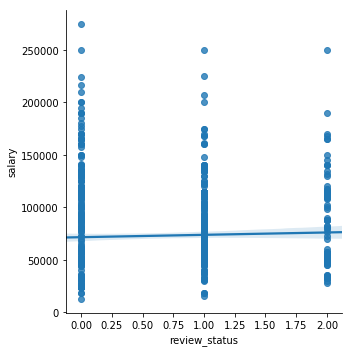

In [19]:
sns.lmplot('review_status', 'salary', data=job_state_df)

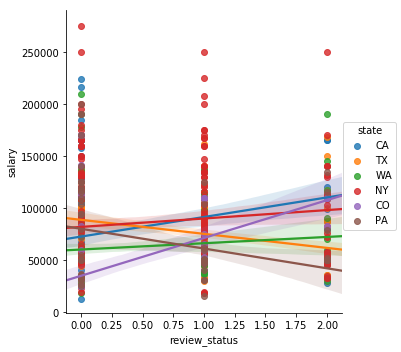

In [20]:
sns.lmplot('review_status', 'salary', hue='state', data=job_state_df)

In [21]:
full_data['above_med_sal'] = np.nan
full_data.loc[full_data['salary'] > full_data['salary'].median(), 'above_med_sal'] = 1
full_data.loc[full_data['salary'] <= full_data['salary'].median(), 'above_med_sal'] = 0

full_data.tail(2)

,title,company,location,summary,salary,href,rate,reviews,org_salary_period,city,state,review_status,above_med_sal
14241,data science instructor,thinkful,plantation fl,You’ll engage with attendees in person on a we...,51700.0,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,31.8,6,hour,Plantation,FL,seldom,0.0
14242,nlp and machine learning internship,mei messaging,new york ny,You will conduct research and help implement a...,23030.0,https://www.indeed.com/company/Mei/jobs/Nlp-Ma...,60.0,3,hour,New York,NY,seldom,0.0


In [22]:
#We'll only be training our model on jobs that have salary data, so separate out salary jobs
salary_data = full_data[full_data.above_med_sal.notnull()]

#splitting out our predictor variables from the salary data
sal_X = salary_data.iloc[:,0:len(salary_data.columns)-1]

#sal_y will be above_med_sal, creating as a dataframe
sal_y = pd.DataFrame(salary_data["above_med_sal"])

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sal_X, sal_y, test_size=0.2, stratify=sal_y, random_state=74) 

X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [24]:
#initializing count vectorizer to examine text-based data for logistical regression. 
from sklearn.feature_extraction.text import CountVectorizer

#Setting n-gram range from 1-3 is about as complex as I want to get. 
#I also want words that appear in at least 5% of postings, to cut out sparsely 
#represented words that won't have helpful discriminating power
cvec = CountVectorizer(stop_words='english',ngram_range=(1, 3), min_df = .05)

In [25]:
#start by fitting on state name, mostly to look at which state names are most associated with 
#above vs. below med salary.
cvec.fit(X_train["state"])

#transforming state data into state_train
state_train = pd.DataFrame(cvec.transform(X_train["state"]).todense(),
                       columns=cvec.get_feature_names())

state_train.reset_index(drop=True, inplace=True)

In [26]:
#Import and fit our logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#fitting state_train and y_train to logistic model and testing the initial score.
lr.fit(state_train, y_train)
lr.score(state_train, y_train)

#there's some predictive power here, but it's not great.

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6262178919397697

In [27]:
#appending y_train to state_train to allow for easier examination of state words 
#associated with above vs. below median salaries
word_observe = pd.concat([state_train, y_train], axis=1)
word_observe.head()

,ca,fl,il,ny,pa,tx,wa,above_med_sal
0,0,0,0,0,0,0,0,1.0
1,0,0,0,0,1,0,0,1.0
2,1,0,0,0,0,0,0,1.0
3,1,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0.0


In [28]:
#Observing most common state "words" for both above and below median salaries
#ignore appearance of "above_med_sal" in 1 most common words.
for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
ny               101.0
fl                79.0
tx                69.0
wa                68.0
ca                60.0
pa                52.0
il                49.0
above_med_sal      0.0
dtype: float64
1 most common words
above_med_sal    561.0
ny                96.0
ca                78.0
tx                69.0
wa                66.0
pa                19.0
il                13.0
fl                 9.0
dtype: float64


In [29]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries
word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with 
#above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal         inf
ca               1.300000
tx               1.000000
wa               0.970588
ny               0.950495
pa               0.365385
il               0.265306
fl               0.113924
Name: above_below_ratio, dtype: float64

In [30]:
#start by fitting on city name, mostly to look at which city names are most associated with 
#above vs. below med salary.
cvec.fit(X_train["city"])

#transforming city data into city_train
city_train = pd.DataFrame(cvec.transform(X_train["city"]).todense(),
                       columns=cvec.get_feature_names())

city_train.reset_index(drop=True, inplace=True)

In [31]:
#Import and fit our logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#fitting city_train and y_train to logistic model and testing the initial score.
lr.fit(city_train, y_train)
lr.score(city_train, y_train)

#there's some predictive power here, but it's not great.

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5048715677590788

In [32]:
#appending y_train to city_train to allow for easier examination of city words 
#associated with above vs. below median salaries
word_observe = pd.concat([city_train, y_train], axis=1)
word_observe.head()

,new,new york,seattle,york,above_med_sal
0,0,0,0,0,1.0
1,0,0,0,0,1.0
2,0,0,0,0,1.0
3,0,0,0,0,0.0
4,0,0,0,0,0.0


In [33]:
#Observing most common city "words" for both above and below median salaries
#ignore appearance of "above_med_sal" in 1 most common words.
for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
york             50.0
new york         50.0
new              50.0
seattle          41.0
above_med_sal     0.0
dtype: float64
1 most common words
above_med_sal    561.0
york              52.0
new york          52.0
new               52.0
seattle           39.0
dtype: float64


In [34]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries
word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with 
#above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal         inf
york             1.040000
new york         1.040000
new              1.040000
seattle          0.951220
Name: above_below_ratio, dtype: float64

In [35]:
#next fit by job title
cvec.fit(X_train["title"])

#transforming job_title data into job_train
job_train = pd.DataFrame(cvec.transform(X_train["title"]).todense(),
                       columns=cvec.get_feature_names())

In [36]:
#fitting job_train and y_train to logistic model and testing the initial score.
lr.fit(job_train, y_train)
lr.score(job_train, y_train)

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7050487156775908

In [37]:
word_observe = pd.concat([job_train, y_train], axis=1)
word_observe.head()

,analyst,clinical,coordinator,data,data analyst,data science,data science instructor,data scientist,developer,engineer,...,learning,machine,machine learning,research,research analyst,science,science instructor,scientist,senior,above_med_sal
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,1.0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1.0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0.0
4,0,0,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0.0


In [38]:
#Observing most common job title "words" for both above and below median salaries

for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
data                       314.0
research                   174.0
analyst                    163.0
research analyst           148.0
scientist                  136.0
data scientist             108.0
science                     93.0
data science                91.0
data science instructor     90.0
instructor                  90.0
science instructor          90.0
coordinator                 60.0
clinical                    56.0
learning                    39.0
engineer                    36.0
machine                     36.0
machine learning            36.0
developer                   15.0
senior                       7.0
data analyst                 1.0
dtype: float64
1 most common words
above_med_sal              561.0
data                       325.0
scientist                  267.0
data scientist             220.0
research                   139.0
analyst                    128.0
data analyst                66.0
research analyst            55.0
developer            

In [39]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries

word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with 
#above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal                    inf
data analyst               66.000000
senior                      7.571429
developer                   3.666667
data scientist              2.037037
scientist                   1.963235
engineer                    1.388889
machine learning            1.222222
machine                     1.222222
learning                    1.153846
data                        1.035032
research                    0.798851
analyst                     0.785276
research analyst            0.371622
science                     0.075269
clinical                    0.053571
coordinator                 0.050000
data science                0.043956
instructor                  0.011111
data science instructor     0.000000
science instructor          0.000000
Name: above_below_ratio, dtype: float64

In [40]:
#next fit by job summary
cvec.fit(X_train["summary"])

#transforming location name data into location_train
summary_train = pd.DataFrame(cvec.transform(X_train["summary"]).todense(),
                       columns=cvec.get_feature_names())

In [41]:
#fitting summary_train and y_train to logistic model and testing the initial score.
lr.fit(summary_train, y_train)
lr.score(summary_train, y_train)

#quite a bit of predictive power here.  This should be ripe for exploration

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8759964570416298

In [42]:
word_observe = pd.concat([summary_train, y_train], axis=1)
word_observe.head()

,analysis,analytics,appropriate,appropriate thinkful,appropriate thinkful department,attendees,attendees person,attendees person weekly,automated,banks,...,weekly basis,weekly basis occasionally,work,work data,work data projects,working,worldwide,worldwide banks,worldwide banks non,above_med_sal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.0


In [46]:
#Observing most common summary "words" for both above and below median salaries

for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
data                   355.0
work                   174.0
investors              162.0
banks                  162.0
department             144.0
services               137.0
projects               128.0
research               119.0
design                 112.0
including              109.0
attendees              104.0
basis                   99.0
collection              98.0
person                  98.0
ll                      98.0
ll engage attendees     97.0
person weekly           97.0
person weekly basis     97.0
engage                  97.0
engage attendees        97.0
dtype: float64
1 most common words
above_med_sal       561.0
data                356.0
analysis            136.0
systems             117.0
working              94.0
work                 88.0
learning             87.0
research             81.0
scientist            81.0
machine              81.0
machine learning     80.0
design               79.0
data scientist       76.0
analytics            73.0
s

In [47]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries

word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal                           inf
performance                       65.000000
machine                           27.000000
machine learning                  26.666667
data scientist                    25.333333
mission                           19.000000
models                            18.666667
analytics                         18.250000
learning                          14.500000
analysis                          12.363636
scientist                         11.571429
using                             11.200000
data scientists                    6.333333
scientists                         5.083333
working                            4.476190
responsible                        4.153846
systems                            2.052632
evaluation                         1.638889
creating                           1.578947
developing                         1.225000
support                            1.125000
data                               1.002817
automated                       

In [48]:
#next fit by job reviews
cvec.fit(X_train["reviews"])

#transforming location name data into location_train
reviews_train = pd.DataFrame(cvec.transform(X_train["reviews"]).todense(),
                       columns=cvec.get_feature_names())

In [49]:
#fitting reviews_train and y_train to logistic model and testing the initial score.
lr.fit(reviews_train, y_train)
lr.score(reviews_train, y_train)

#quite a bit of predictive power here.  This should be ripe for exploration

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5482728077945084

In [50]:
word_observe = pd.concat([reviews_train, y_train], axis=1)
word_observe.head()

,14,20,above_med_sal
0,0,0,1.0
1,0,0,1.0
2,0,0,1.0
3,0,0,0.0
4,0,0,0.0


In [51]:
#Observing most common reviews "words" for both above and below median salaries

for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)

0 most common words
20               60.0
14               29.0
above_med_sal     0.0
dtype: float64
1 most common words
above_med_sal    561.0
14                51.0
20                 2.0
dtype: float64


In [52]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries

word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal         inf
14               1.758621
20               0.033333
Name: above_below_ratio, dtype: float64

In [54]:
#next fit by original salary period
cvec.fit(X_train["org_salary_period"])

#transforming location name data into location_train
org_salary_period_train = pd.DataFrame(cvec.transform(X_train["org_salary_period"]).todense(),
                       columns=cvec.get_feature_names())

In [55]:
#fitting city_train and y_train to logistic model and testing the initial score.
lr.fit(org_salary_period_train, y_train)
lr.score(org_salary_period_train, y_train)

/Users/yizhuoli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6465899025686448

In [56]:
word_observe = pd.concat([org_salary_period_train, y_train], axis=1)
word_observe.head()

,hour,year,above_med_sal
0,1,0,1.0
1,0,1,1.0
2,0,1,1.0
3,1,0,0.0
4,1,0,0.0


In [57]:
#Observing most common salary "words" for both above and below median salaries

for i in range(2):
    word_count = word_observe[word_observe["above_med_sal"]==i].sum(axis=0)
    print (i, "most common words")
    cw = word_count.sort_values(ascending = False).head(20)
    print (cw)
    print

0 most common words
year             316.0
hour             222.0
above_med_sal      0.0
dtype: float64
1 most common words
above_med_sal    561.0
year             478.0
hour              77.0
dtype: float64


In [58]:
#creating separate lists of the top appearing words so that these can be combined 
#and compared to create ratios of appearances in above median vs. below median salaries

word_count_below = word_observe[word_observe["above_med_sal"]==0].sum(axis=0)
word_count_above = word_observe[word_observe["above_med_sal"]==1].sum(axis=0)

#creating as dataframe, using method ".T" to transpose columns with index.
word_count_compare = pd.DataFrame([word_count_below, word_count_above]).T

#creating a "ratio" column to determine frequency of words associated with 
#above median jobs vs. below median jobs
word_count_compare["above_below_ratio"] = word_count_compare[1]/word_count_compare[0]

word_count_compare.above_below_ratio.sort_values(ascending=False)

above_med_sal         inf
year             1.512658
hour             0.346847
Name: above_below_ratio, dtype: float64

### Existing Problem ###  
1. lots of same job. They are not exactly same, but may come from the same company but not the same location or only a few differences.  
2. Most rate companies do not heve more salary in TX may reflect that TX is still development.

In [24]:
full_data['salary'].value_counts()

51700.0     114
50000.0      99
57500.0      98
47500.0      67
24910.0      66
61000.0      64
100000.0     64
115000.0     58
126900.0     51
87500.0      46
42500.0      45
24440.0      42
110000.0     25
78102.0      23
56400.0      19
140000.0     13
135000.0     11
150000.0     10
120000.0     10
32900.0      10
130000.0     10
125000.0     10
160000.0      9
60000.0       9
165000.0      9
90000.0       8
85000.0       7
170000.0      7
80000.0       6
55000.0       6
           ... 
48504.0       1
48500.0       1
153024.0      1
25850.0       1
43954.4       1
30550.0       1
31020.0       1
58000.0       1
207387.5      1
21150.0       1
223720.0      1
77035.0       1
52850.0       1
195000.0      1
22325.0       1
36450.0       1
112500.0      1
63061.5       1
64000.0       1
76950.0       1
29476.5       1
275000.0      1
113796.0      1
95340.0       1
83000.0       1
68648.5       1
82973.0       1
216200.0      1
44551.0       1
67584.0       1
Name: salary, Length: 27